In [1]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('IBM/train_ctrUa4K.csv')
columnNames = pd.Series(df.columns.values) # to check the columns/variables/features present in our data set
# xóa những trường thiếu giá trị
df.dropna(axis=0, how='any', inplace=True)
df = df.drop(['Loan_ID'], axis=1)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [2]:
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
274,3900,0.0,90.0,360.0,1.0,1,1,0,1,0,0,0,1,0,1
106,11417,1126.0,225.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
264,5166,0.0,128.0,360.0,1.0,1,0,0,0,0,0,1,1,0,1
25,9560,0.0,191.0,360.0,1.0,1,1,0,0,0,0,1,1,0,1
442,4707,1993.0,148.0,360.0,1.0,1,0,0,0,1,1,0,1,0,1


In [3]:
df = pd.get_dummies(df,drop_first=True)
df.to_csv("qwe.csv")
df.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
66,3200,2254.0,126.0,180.0,0.0,1,0,0,0,0,1,0,0,1,0
480,4350,0.0,154.0,360.0,1.0,0,0,0,0,0,1,0,0,0,1
285,3158,3053.0,89.0,360.0,1.0,1,0,0,0,0,0,0,0,0,1
462,3015,2188.0,153.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
60,2500,3796.0,120.0,360.0,1.0,1,1,0,0,0,0,0,0,1,1


In [4]:
af_1 = df.drop('Loan_Status_Y',axis=1)
X_train, X_test,y_train, y_test = train_test_split(af_1,df['Loan_Status_Y'])

In [5]:
logi = LogisticRegression(solver='lbfgs')
logi.fit(X_train,y_train)

LogisticRegression()

In [6]:
logi.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [7]:
# logi.score(X_test,y_test)
# X_test[[dates[5]]

In [8]:
#LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
#9,12841,10968.0,349.0,360.0,1.0,1,1,1,0,0,0,0,1,0 ,0
# logi.predict(af_1[0:1])[0]
df['test'] = pd.DataFrame(logi.predict(X_test))
df['test'].value_counts()
df.sample(5)
# pd.DataFrame(logi.predict(X_test))

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,test
311,2927,2405.0,111.0,360.0,1.0,1,0,0,0,0,1,0,1,0,1,NaN
296,6875,0.0,200.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1,NaN
457,3708,2569.0,173.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0,NaN
326,4917,0.0,130.0,360.0,0.0,1,0,0,0,0,0,0,0,0,1,NaN
573,6125,1625.0,187.0,480.0,1.0,1,1,0,1,0,1,0,1,0,0,NaN


In [9]:
# input12 = np.array(['Male','Yes',2,'Graduate','Yes',5417,4196,267,360,1,'Urban']),col

# df2 = pd.DataFrame(np.array([[1, 2, 3]]),columns=['a', 'b', 'c'])

# df2 = pd.DataFrame(np.array([['Male','Yes',2,'Graduate','Yes',5417,4196,267,360,1,'Urban']]),columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'
# ])



# xuly = pd.get_dummies(df2,drop_first=True)
# xuly

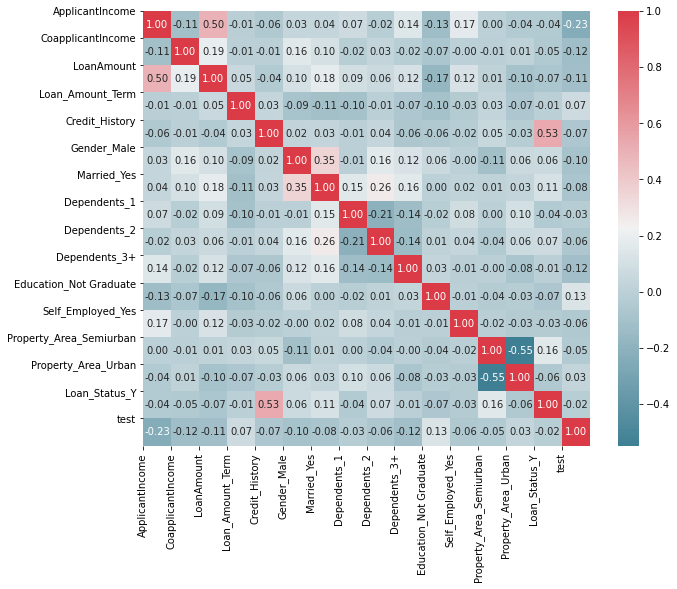

KeyError: "None of [Index(['REASON', 'JOB'], dtype='object')] are in the [columns]"

In [10]:
#Create Correlation matrix
# Tạo ma trận Tương quan
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()
#encoding
df=pd.get_dummies(df, columns=['REASON','JOB'])
df